In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Value:

    def __init__(self, x):
        self.data = x

    def __repr__(self):
        return f"Value(data={self.data})"

In [3]:
a = Value(2.0)
a

Value(data=2.0)

In [4]:
#b = Value(3.0)
#a + b

In [5]:
class Value:

    def __init__(self, x):
        self.data = x

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):                  ###
        output = Value(self.data + other.data) ###
        return output                          ###

In [6]:
a = Value(2.0)
b = Value(3.0)
a + b # a.__add__(b)

Value(data=5.0)

In [7]:
a.__add__(b)

Value(data=5.0)

In [8]:
class Value:

    def __init__(self, x):
        self.data = x

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data)
        return output

    def __mul__(self, other):                  ###
        output = Value(self.data * other.data) ###
        return output                          ###

In [9]:
a = Value(2.0)
b = Value(-3.0)
a * b # a.__mul__(b)

Value(data=-6.0)

In [10]:
c = Value(10)
a * b + c #(a.__mul__(b)).__add__(c)

Value(data=4.0)

In [11]:
(a.__mul__(b)).__add__(c)

Value(data=4.0)

In [12]:
class Value:

    def __init__(self, x, children=()):   ###
        self.data = x
        self.prev = children              ###

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other)) ###
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other)) ###
        return output

In [13]:
d = a * b + c 

In [14]:
d.prev

(Value(data=-6.0), Value(data=10))

In [15]:
class Value:

    def __init__(self, x, children=(), operation=''):   ###
        self.data = x
        self.prev = children
        self.op = operation                             ###

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other), '+') ###
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other), '*') ###
        return output

In [16]:
d = a * b + c

In [17]:
d.op

'+'

In [18]:
d.prev

(Value(data=-6.0), Value(data=10))

In [19]:
d

Value(data=4.0)

In [20]:
class Value:

    def __init__(self, x, children=(), operation='', label=''): ###
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label                                      ###
        self.grad = 0.0                                         ###

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other), '+')
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other), '*')
        return output

In [21]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.prev :
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n.op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n.op, label = n.op)
            # and connect this node to it
            dot.edge(uid + n.op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2.op)

    return dot

In [22]:
#inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias
b = Value(6.7, label = 'b')

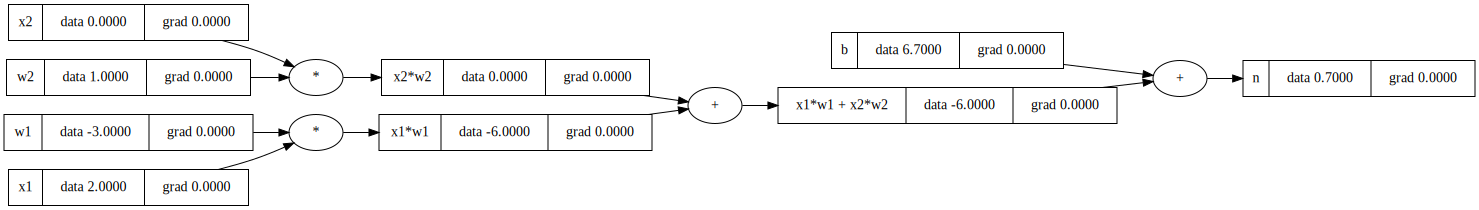

In [23]:
# x1*w1 + x2*w2 + b  
a1 = x1 * w1; a1.label = 'x1*w1'
a2 = x2 * w2; a2.label = 'x2*w2'
s = a1 + a2; s.label = 'x1*w1 + x2*w2'
n = s + b; n.label = 'n'

draw_dot(n)

In [24]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other), '+')
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other), '*')
        return output

    def tanh(self):                                         ###
        return Value(np.tanh(self.data), (self, ), 'tanh')  ###

In [25]:
#inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias
b = Value(8, label = 'b')

# x1*w1 + x2*w2 + b  
a1 = x1 * w1; a1.label = 'x1*w1'
a2 = x2 * w2; a2.label = 'x2*w2'
s = a1 + a2; s.label = 'x1*w1 + x2*w2'
n = s + b; n.label = 'n'

o = n.tanh(); o.label = 'output'
o

Value(data=0.9640275800758169)

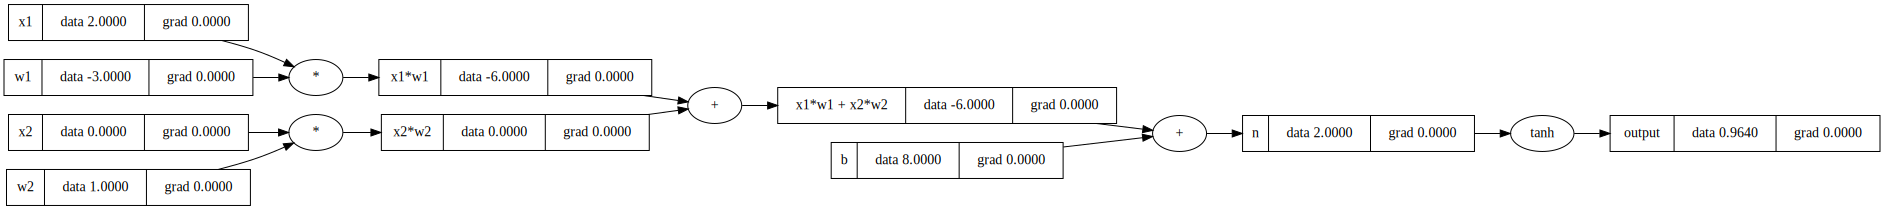

In [26]:
draw_dot(o)

In [27]:
#inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b  
a1 = x1 * w1; a1.label = 'x1*w1'
a2 = x2 * w2; a2.label = 'x2*w2'
s = a1 + a2; s.label = 'x1*w1 + x2*w2'
n = s + b; n.label = 'n'

o = n.tanh(); o.label = 'output'
o

Value(data=0.7071067811865476)

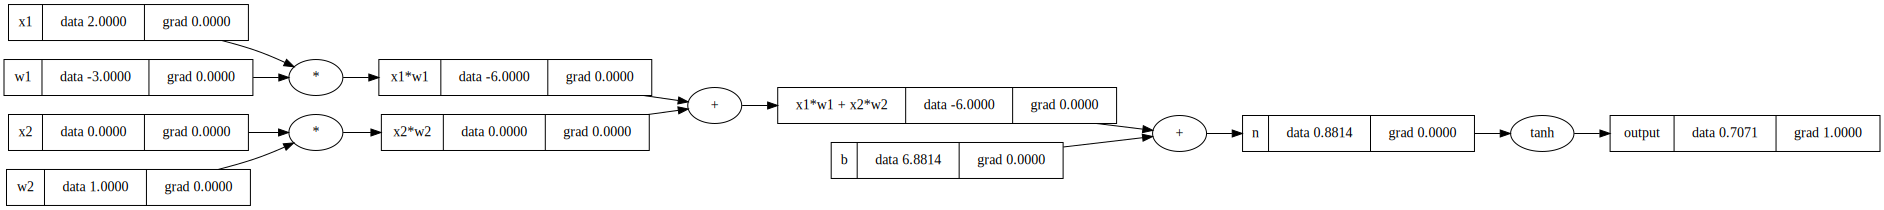

In [28]:
o.grad = 1.0

draw_dot(o)

In [29]:
# d tanh(n) / d n = 1 - tanh(n)**2   

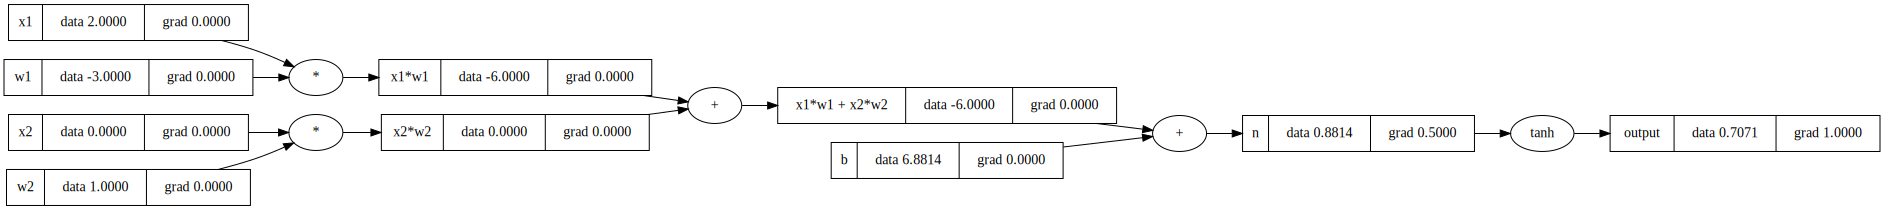

In [30]:
n.grad = 1 - o.data**2

draw_dot(o)

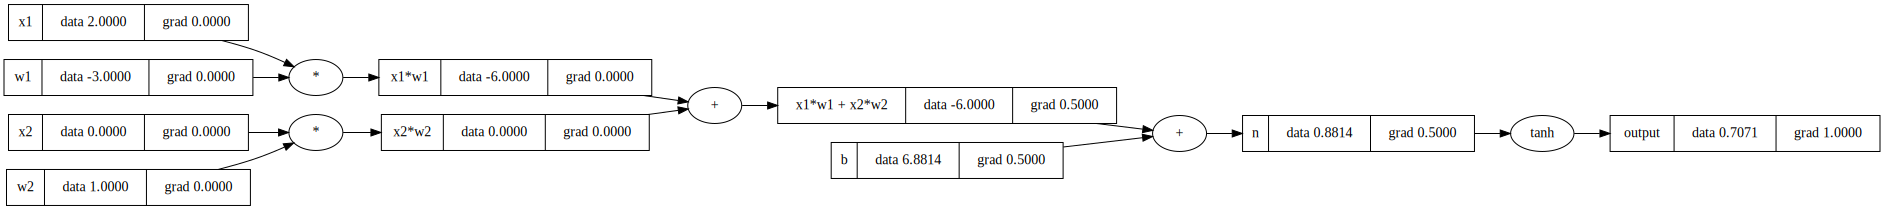

In [31]:
s.grad = 0.5
b.grad = 0.5 

draw_dot(o)

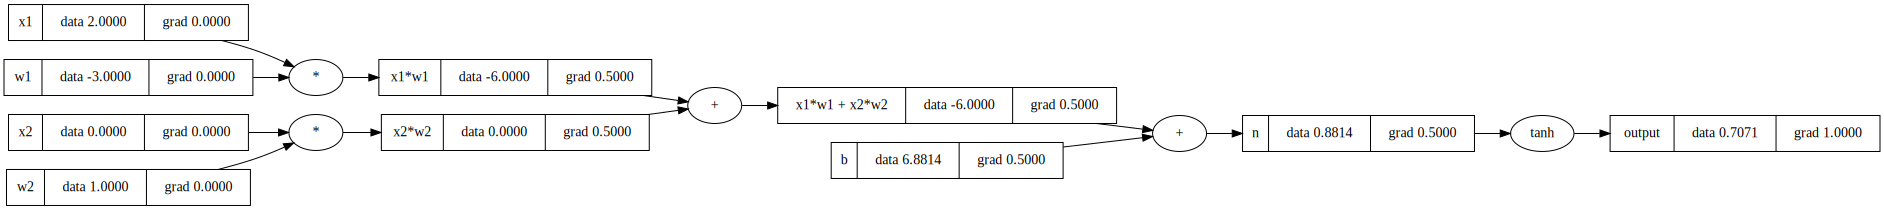

In [32]:
a1.grad = 0.5
a2.grad = 0.5

draw_dot(o)

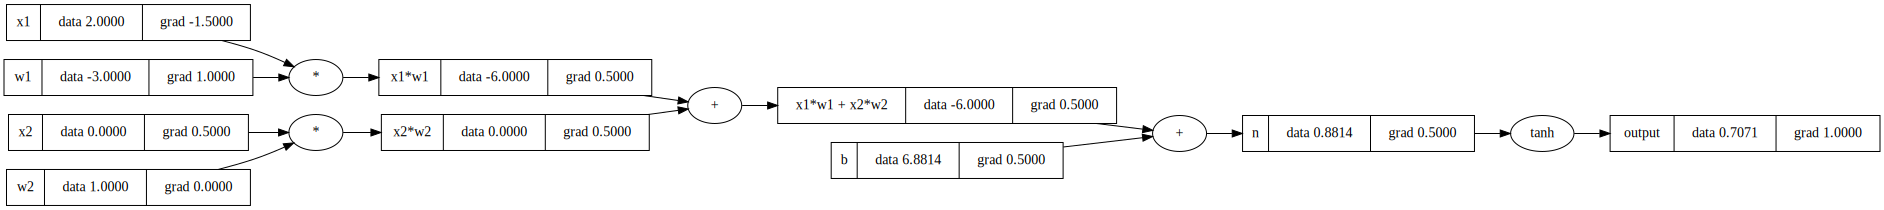

In [33]:
w1.grad = x1.data * a1.grad
x1.grad = w1.data * a1.grad
w2.grad = x2.data * a2.grad
x2.grad = w2.data * a2.grad

draw_dot(o)

In [34]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None                 ###
        
#       def do_nothing():
#           return None
#       self._backward = do_nothing

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other), '+')
        
        def _backward():                              ###
            self.grad = 1.0 * output.grad             ###
            other.grad = 1.0 * output.grad            ###

        output._backward = _backward                  ###
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other), '*')

        def _backward():                              ###
            self.grad = other.data * output.grad      ###
            other.grad = self.data * output.grad      ###

        output._backward = _backward                  ###
        return output

    def tanh(self):
        output = Value(np.tanh(self.data), (self, ), 'tanh')

        def _backward():                                             ###
            self.grad = (1 - np.tanh(self.data)**2 ) * output.grad   ###

        output._backward = _backward                                 ###
        return output

In [35]:
#inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b  
a1 = x1 * w1; a1.label = 'x1*w1'
a2 = x2 * w2; a2.label = 'x2*w2'
s = a1 + a2; s.label = 'x1*w1 + x2*w2'
n = s + b; n.label = 'n'

o = n.tanh(); o.label = 'output'
o

Value(data=0.7071067811865476)

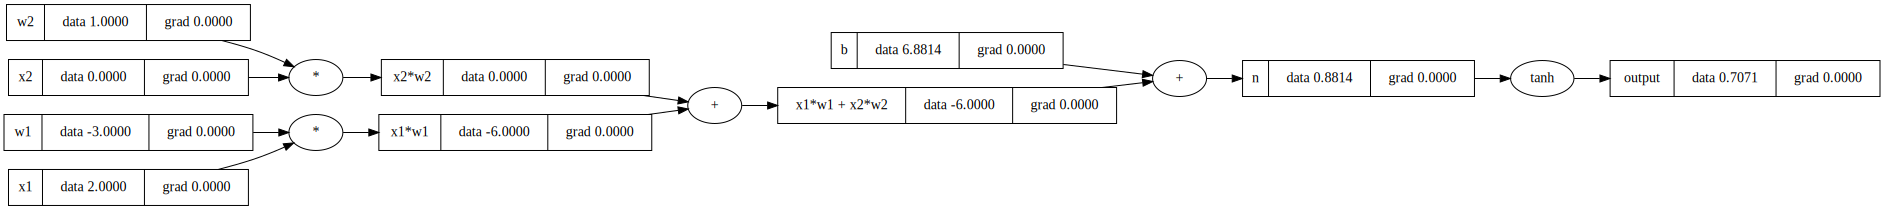

In [36]:
draw_dot(o)

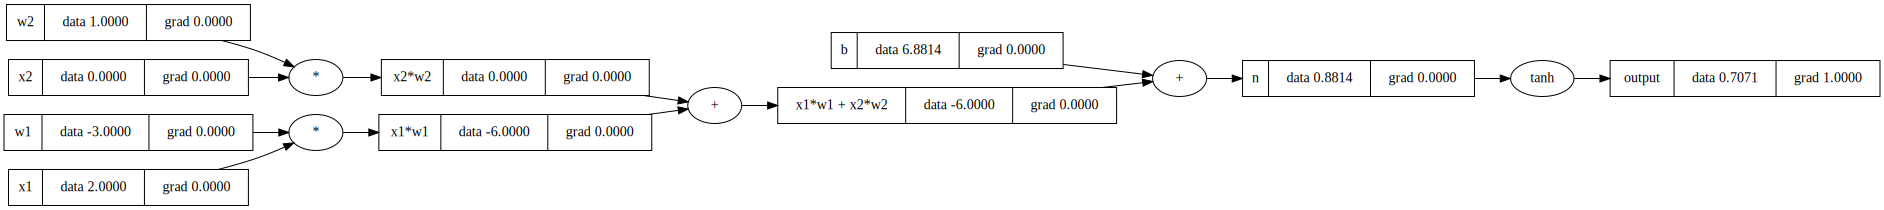

In [37]:
o.grad = 1.0

draw_dot(o)

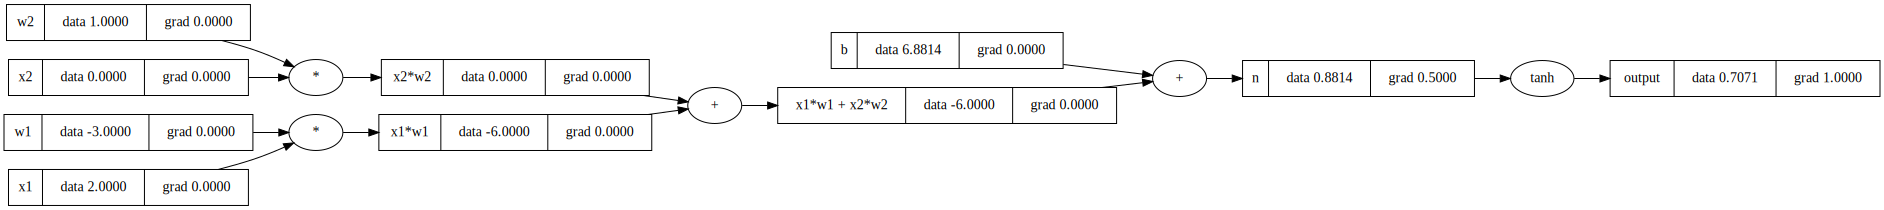

In [38]:
o._backward()

draw_dot(o)

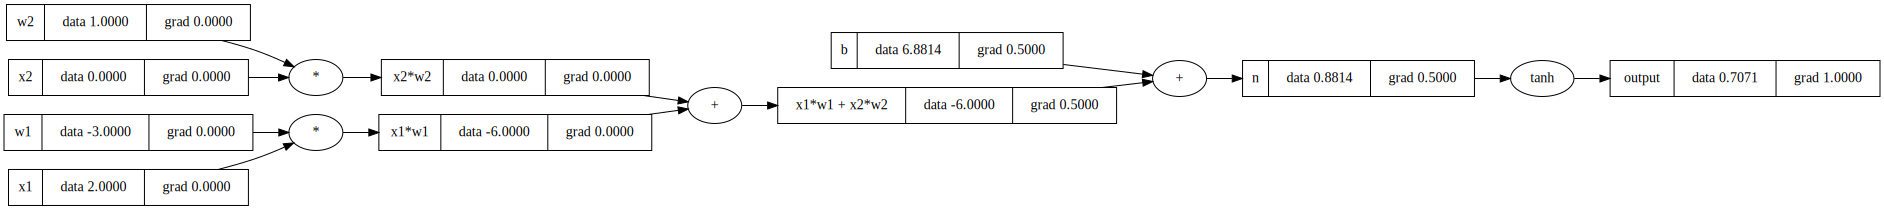

In [39]:
n._backward()

draw_dot(o)

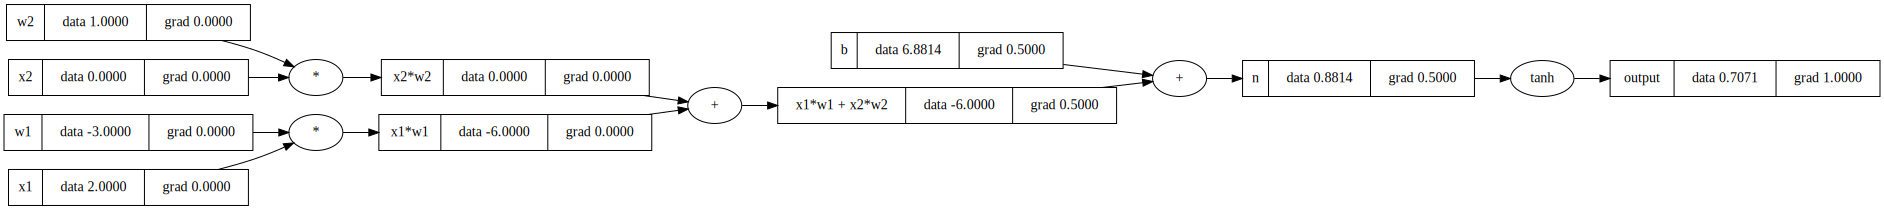

In [40]:
b._backward()

draw_dot(o)

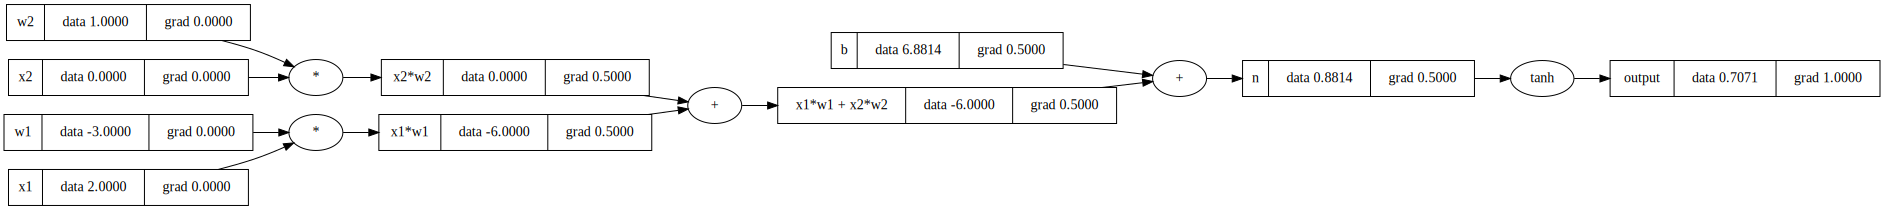

In [41]:
s._backward()

draw_dot(o)

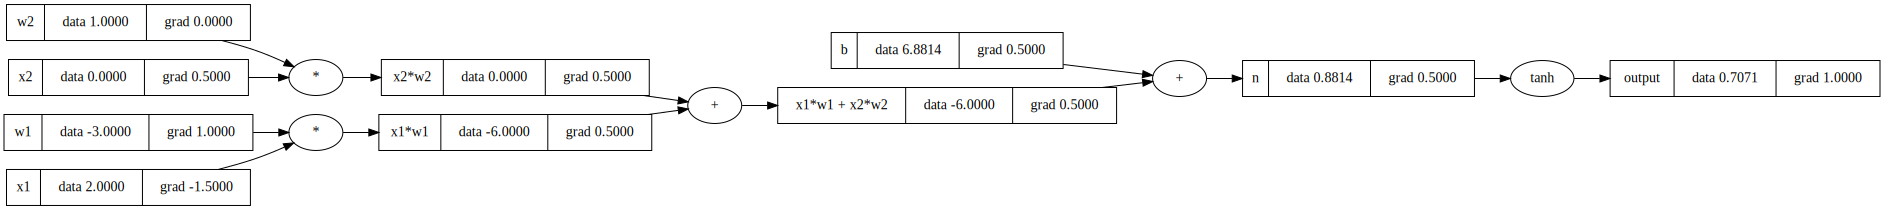

In [42]:
a1._backward()
a2._backward()

draw_dot(o)

In [43]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v.prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

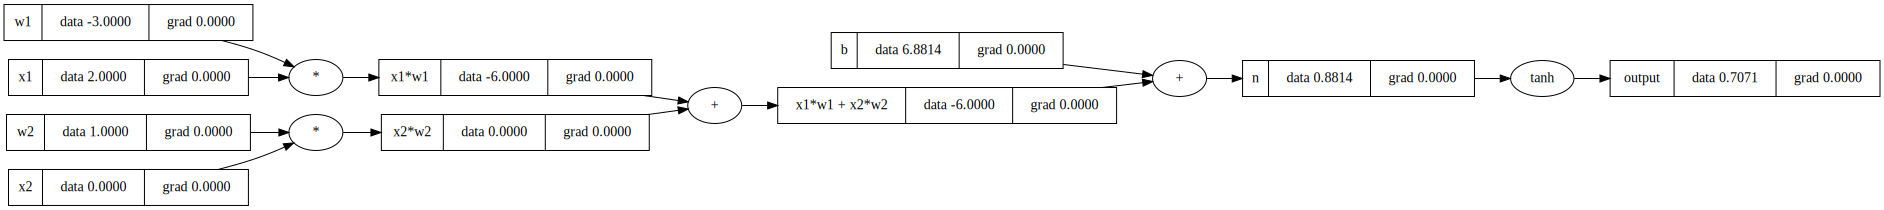

In [44]:
#inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b  
a1 = x1 * w1; a1.label = 'x1*w1'
a2 = x2 * w2; a2.label = 'x2*w2'
s = a1 + a2; s.label = 'x1*w1 + x2*w2'
n = s + b; n.label = 'n'

o = n.tanh(); o.label = 'output'
draw_dot(o)

In [45]:
o.grad = 1.0

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v.prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

for node in reversed(topo):
    node._backward()

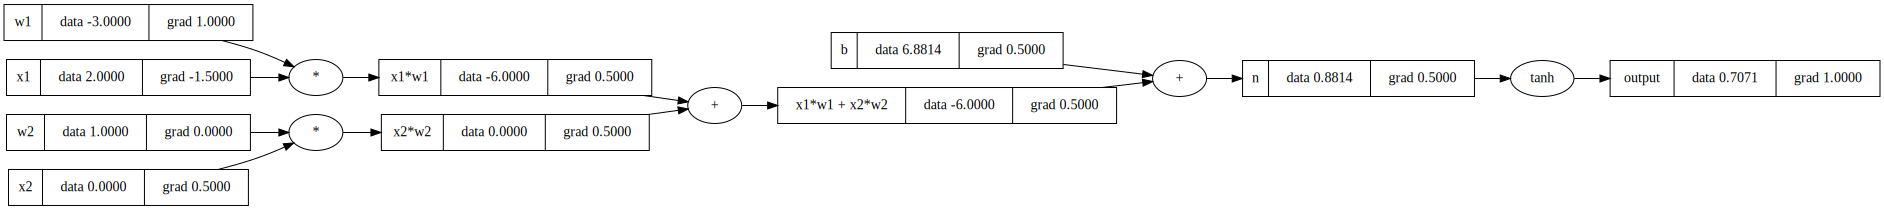

In [46]:
draw_dot(o)

In [47]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad = 1.0 * output.grad
            other.grad = 1.0 * output.grad

        output._backward = _backward
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * output.grad
            other.grad = self.data * output.grad

        output._backward = _backward
        return output

    def tanh(self):
        output = Value(np.tanh(self.data), (self, ), 'tanh')

        def _backward():
            self.grad = (1 - np.tanh(self.data)**2 ) * output.grad

        output._backward = _backward
        return output

    def backward(self):                            ###
        
        topo = []                                  ###
        visited = set()                            ###
        def build_topo(v):                         ###
            if v not in visited:                   ###
                visited.add(v)                     ###
                for child in v.prev:               ###
                    build_topo(child)              ### 
                topo.append(v)                     ###

        build_topo(self)                           ###
        self.grad = 1.0                            ###
        for node in reversed(topo):                ###
            node._backward()                       ###

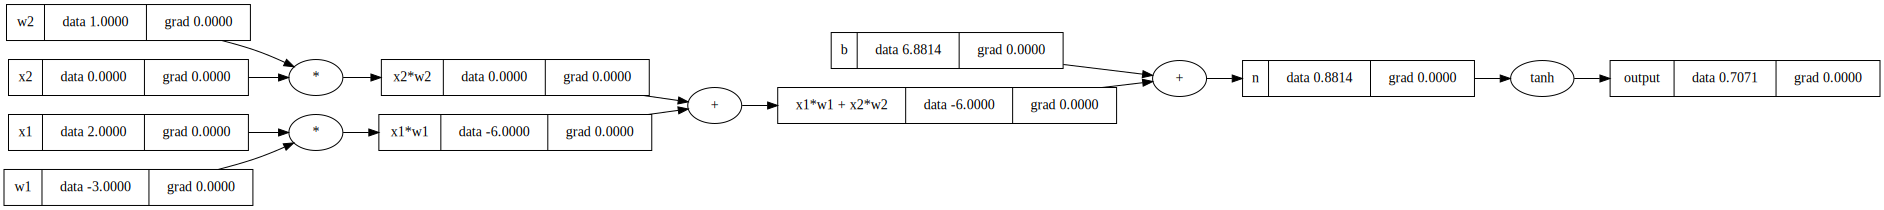

In [48]:
#inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b  
a1 = x1 * w1; a1.label = 'x1*w1'
a2 = x2 * w2; a2.label = 'x2*w2'
s = a1 + a2; s.label = 'x1*w1 + x2*w2'
n = s + b; n.label = 'n'

o = n.tanh(); o.label = 'output'
draw_dot(o)

In [49]:
o.backward()

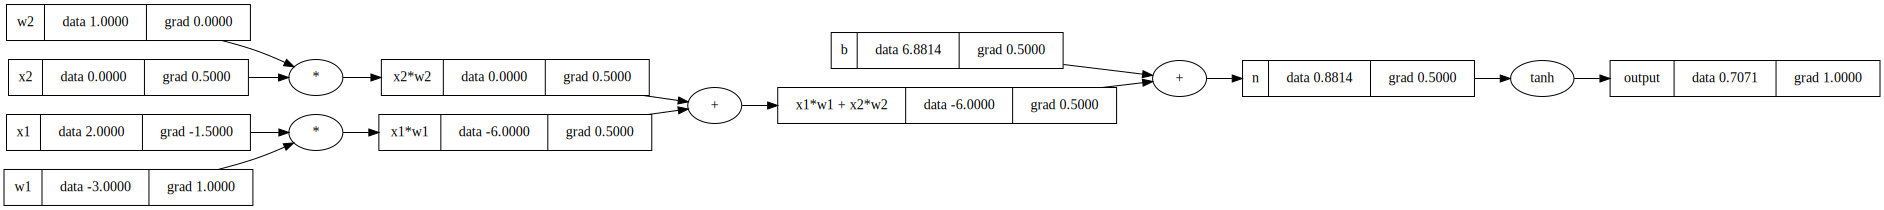

In [50]:
draw_dot(o)

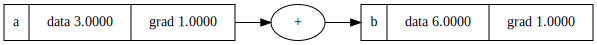

In [51]:
a = Value(3.0, label = 'a')
b = a + a; b.label = 'b'

b.backward()
draw_dot(b)

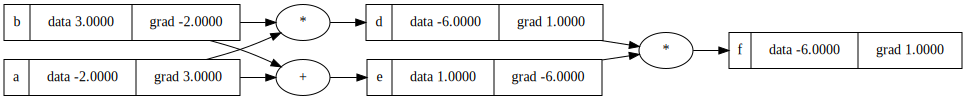

In [52]:
a = Value(-2.0, label = 'a')
b = Value(3.0, label = 'b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

f.backward()
draw_dot(f)

In [53]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * output.grad      ###
            other.grad += 1.0 * output.grad     ###

        output._backward = _backward
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * output.grad   ###
            other.grad += self.data * output.grad   ###

        output._backward = _backward
        return output

    def tanh(self):
        output = Value(np.tanh(self.data), (self, ), 'tanh')

        def _backward():
            self.grad += (1 - np.tanh(self.data)**2 ) * output.grad ###

        output._backward = _backward
        return output

    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

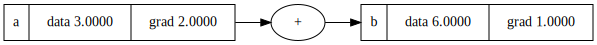

In [54]:
a = Value(3.0, label = 'a')
b = a + a; b.label = 'b'

b.backward()
draw_dot(b)

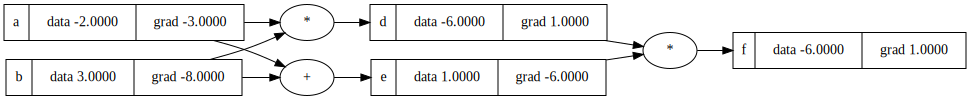

In [55]:
a = Value(-2.0, label = 'a')
b = Value(3.0, label = 'b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

f.backward()
draw_dot(f)